#Image Classification using a linear model

## Download Data

In [8]:
!gsutil cat gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/train_set.csv | head -20

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/18089878729_907ed2c7cd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/4065883015_4bb6010cb7_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg,roses
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/4558536575_d43a611bd4_n.jpg,dandelion
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/7568630428_8cf0fc16ff_n.jpg,daisy
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/7064813645_f7f48fb527.jpg,tulips
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/4933229095

In [2]:
# Verify connection with GPU
import tensorflow as tf
print(tf.version.VERSION)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

2.12.0
Found GPU at: /device:GPU:0


## Read Images

In [3]:
import matplotlib.pylab as plt
import numpy as np
import tensorflow as tf
IMG_HEIGHT = 224
IMG_WIDTH = 224
IMG_CHANNELS = 3

In [4]:
def read_and_decode(filename, reshape_dims):
  # Bytes Seq
  img = tf.io.read_file(filename)
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.image.decode_jpeg(img, channels = 3)
  # Convert Int [0, 255] to float
  img = tf.image.convert_image_dtype(img, tf.float32)
  # Resize the image to the desired size, example: tf.image.resize(img, [256, 128])
  return tf.image.resize(img, reshape_dims)

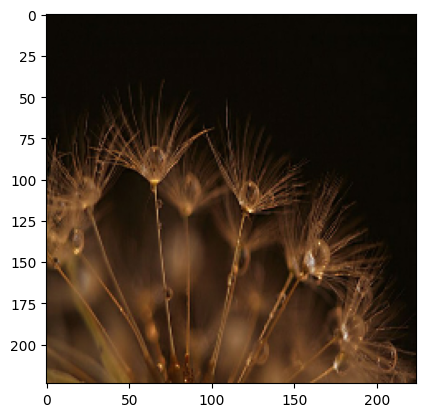

In [12]:
def show_image(filename):
  # Read and decode img
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  # Convert TF to numpy and show image
  plt.imshow(img.numpy())

show_image("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/284497199_93a01f48f6.jpg")

In [15]:
# Get specific class
dandelion = tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/*.jpg")

gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/10477378514_9ffbcec4cf_m.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/10486992895_20b344ce2d_n.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/10617162044_8740d4dd9f_n.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/10617191174_9a01753241_n.jpg
gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/10683189_bd6e371b97.jpg


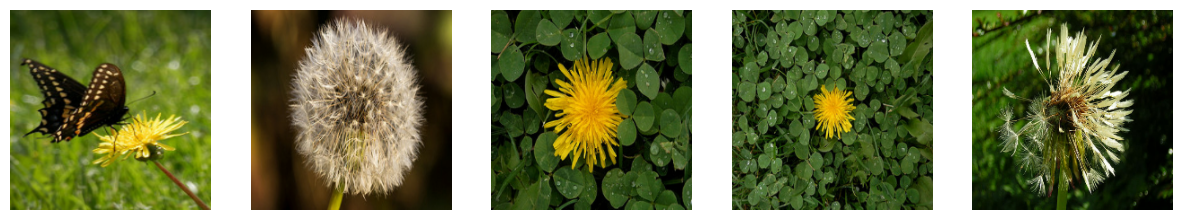

In [17]:
# Visualize images
f, ax = plt.subplots(1, 5, figsize=(15,15))
for idx, filename in enumerate(dandelion[5:10]):
  print(filename)
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].axis('off')

In [ ]:
# Get all data
# tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*/*.jpg")

## Get Labels

In [21]:
# Get basename with regex_replace(input, pattern, rewrite)
basename = tf.strings.regex_replace("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/*.jpg",
                                    "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/",
                                    "")
basename

<tf.Tensor: shape=(), dtype=string, numpy=b'dandelion/*.jpg'>

In [22]:
# Split string with split(string, sep)
label = tf.strings.split(basename, "/")[0]
label

<tf.Tensor: shape=(), dtype=string, numpy=b'dandelion'>

In [24]:
CLASS_NAMES = [item.numpy().decode("utf-8") for item in 
               tf.strings.regex_replace(
                 tf.io.gfile.glob("gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/*"),
                 "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/", "")]
CLASS_NAMES = [item for item in CLASS_NAMES if item.find(".") == -1]
print("Available classes:", CLASS_NAMES)

Available classes: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


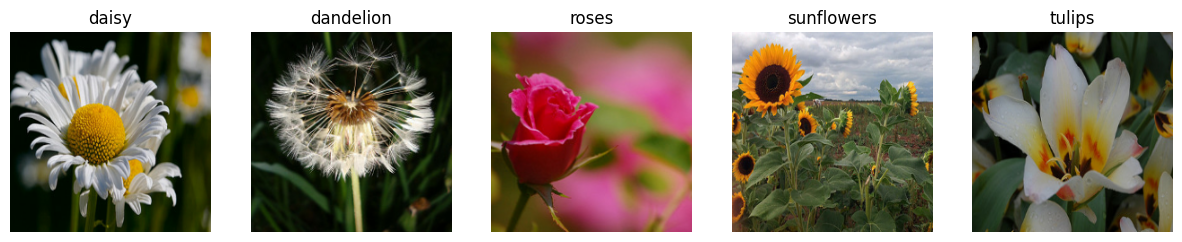

In [25]:
files_paths = [
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/daisy/754296579_30a9ae018c_n.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/dandelion/3554992110_81d8c9b0bd_m.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/roses/7420699022_60fa574524_m.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/sunflowers/21518663809_3d69f5b995_n.jpg",
  "gs://practical-ml-vision-book/flowers_5_jpeg/flower_photos/tulips/8713398906_28e59a225a_n.jpg"
]

f, ax = plt.subplots(1, 5, figsize=(15,15))
for idx, filename in enumerate(files_paths):
  img = read_and_decode(filename, [IMG_HEIGHT, IMG_WIDTH])
  ax[idx].imshow((img.numpy()));
  ax[idx].set_title(CLASS_NAMES[idx])
  ax[idx].axis('off')